In [46]:
from osgeo import gdal
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import xarray as xr

In [47]:
ds_dev_present= xr.open_dataset(dev_present_file)
ds_dev_present

<xarray.Dataset>
Dimensions:        (run_number: 23, M: 282, N: 192, time: 1, KMAXOUT: 6,
                    MC: 282, NC: 192, KMAXOUT_RESTR: 5, LSTSCI: 2, LTUR: 2,
                    SIG_INTF: 6, SIG_LYR: 5)
Coordinates:
  * KMAXOUT        (KMAXOUT) int32 0 1 2 3 4 5
  * KMAXOUT_RESTR  (KMAXOUT_RESTR) int32 0 1 2 3 4
  * SIG_INTF       (SIG_INTF) float32 0.0 -0.005 -0.05 -0.2 -0.6 -1.0
  * SIG_LYR        (SIG_LYR) float32 -0.0025 -0.0275 -0.125 -0.4 -0.8
    XCOR           (MC, NC) float32 ...
    XZ             (M, N) float32 ...
    YCOR           (MC, NC) float32 ...
    YZ             (M, N) float32 ...
  * time           (time) datetime64[ns] 2009-10-03
Dimensions without coordinates: run_number, M, N, MC, NC, LSTSCI, LTUR
Data variables: (12/32)
    ALFAS          (run_number, M, N) float32 ...
    DICWW          (run_number, time, KMAXOUT, M, N) float32 ...
    DP0            (run_number, MC, NC) float32 ...
    DPS0           (run_number, M, N) float32 ...
    DPU0           (run_number, MC, N) float32 ...
    DPV0           (run_number, M, NC) float32 ...
    ...             ...
    VICUV          (run_number, time, KMAXOUT_RESTR, M, N) float32 ...
    VICWW          (run_number, time, KMAXOUT, M, N) float32 ...
    VMNLDF         (run_number, time, M, NC) float32 ...
    W              (run_number, time, KMAXOUT, M, N) float32 ...
    WPHY           (run_number, time, KMAXOUT_RESTR, M, N) float32 ...
    grid           (run_number) int32 ...
Attributes:
    Conventions:               CF-1.6
    institution:               Deltares
    references:                www.deltares.nl
    source:                    Deltares, FLOW2D3D Version 6.02.07.6891, Aug 1...
    history:                   Thu Jun 20 11:38:47 2019: ncecat -n 23,3,1 -u ...
    NCO:                       "4.5.4"
    nco_openmp_thread_number:  1

In [2]:
receptor_filename = r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\oregon\receptor\grainsize_receptor.tif"
dev_present_file = r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\oregon\devices-present\trim_sets_flow_inset_allruns.nc"
file_dev_present = Dataset(dev_present_file)
xcor = file_dev_present.variables["XCOR"][:].data
# Y-coordinate of cell center
ycor = file_dev_present.variables["YCOR"][:].data
data_dev = file_dev_present.variables['TAUMAX'][:]
TAUMAX = np.squeeze(data_dev[0,:])

In [3]:
data_dev = file_dev_present.variables['TAUMAX'][:]  
data_dev.shape


(23, 1, 282, 192)

In [4]:
data_dev = np.flip(data_dev, axis=3)
data_dev.shape

(23, 1, 282, 192)

In [ ]:
import os
path = 'C:\Test\director\this one'
os.path.dirname(path)

In [5]:
TAUMAX.shape

(282, 192)

In [6]:
data = gdal.Open(receptor_filename)
img = data.GetRasterBand(1)
receptor_array = img.ReadAsArray()


In [49]:
np.unique(receptor_array) * 1e-6

array([0.0000000e+00, 4.9999999e-05, 1.4999999e-04, 2.9999999e-04,
       4.9999999e-03], dtype=float32)

In [7]:
receptor_array.shape

(192, 282)

In [8]:

# transpose to be in same orientation as NetCDF
# receptor_array = np.transpose(receptor_array)
receptor_array[receptor_array < 0] = 0


In [9]:
receptor_array.shape

(192, 282)

In [10]:
(upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = data.GetGeoTransform()
cols = data.RasterXSize
rows = data.RasterYSize

In [11]:
np.shape(receptor_array)

(192, 282)

In [12]:
r_rows = np.arange(rows) * y_size + upper_left_y + (y_size / 2)
r_rows

array([44.671, 44.67 , 44.669, 44.668, 44.667, 44.666, 44.665, 44.664,
       44.663, 44.662, 44.661, 44.66 , 44.659, 44.658, 44.657, 44.656,
       44.655, 44.654, 44.653, 44.652, 44.651, 44.65 , 44.649, 44.648,
       44.647, 44.646, 44.645, 44.644, 44.643, 44.642, 44.641, 44.64 ,
       44.639, 44.638, 44.637, 44.636, 44.635, 44.634, 44.633, 44.632,
       44.631, 44.63 , 44.629, 44.628, 44.627, 44.626, 44.625, 44.624,
       44.623, 44.622, 44.621, 44.62 , 44.619, 44.618, 44.617, 44.616,
       44.615, 44.614, 44.613, 44.612, 44.611, 44.61 , 44.609, 44.608,
       44.607, 44.606, 44.605, 44.604, 44.603, 44.602, 44.601, 44.6  ,
       44.599, 44.598, 44.597, 44.596, 44.595, 44.594, 44.593, 44.592,
       44.591, 44.59 , 44.589, 44.588, 44.587, 44.586, 44.585, 44.584,
       44.583, 44.582, 44.581, 44.58 , 44.579, 44.578, 44.577, 44.576,
       44.575, 44.574, 44.573, 44.572, 44.571, 44.57 , 44.569, 44.568,
       44.567, 44.566, 44.565, 44.564, 44.563, 44.562, 44.561, 44.56 ,
      

In [13]:
r_cols = np.arange(cols) * x_size + upper_left_x + (x_size / 2)
r_cols = np.where(r_cols<0, r_cols+360, r_cols)
r_cols

array([235.71601, 235.71681, 235.71761, 235.71841, 235.71921, 235.72001,
       235.72081, 235.72161, 235.72241, 235.72321, 235.72401, 235.72481,
       235.72561, 235.72641, 235.72721, 235.72801, 235.72881, 235.72961,
       235.73041, 235.73121, 235.73201, 235.73281, 235.73361, 235.73441,
       235.73521, 235.73601, 235.73681, 235.73761, 235.73841, 235.73921,
       235.74001, 235.74081, 235.74161, 235.74241, 235.74321, 235.74401,
       235.74481, 235.74561, 235.74641, 235.74721, 235.74801, 235.74881,
       235.74961, 235.75041, 235.75121, 235.75201, 235.75281, 235.75361,
       235.75441, 235.75521, 235.75601, 235.75681, 235.75761, 235.75841,
       235.75921, 235.76001, 235.76081, 235.76161, 235.76241, 235.76321,
       235.76401, 235.76481, 235.76561, 235.76641, 235.76721, 235.76801,
       235.76881, 235.76961, 235.77041, 235.77121, 235.77201, 235.77281,
       235.77361, 235.77441, 235.77521, 235.77601, 235.77681, 235.77761,
       235.77841, 235.77921, 235.78001, 235.78081, 

In [20]:
# xnew = x[0:-1:2]
# ynew = y[0:-1:2]
# xp,yp = np.meshgrid(ynew, xnew)

x_grid, y_grid = np.meshgrid(r_cols, r_rows)

In [21]:
receptor_array.shape

(192, 282)

In [22]:
x_grid.shape

(192, 282)

In [32]:

z = griddata((x_grid.flatten(), y_grid.flatten()), receptor_array.flatten(), (xcor,ycor), method='nearest', fill_value=0)
# interp = RegularGridInterpolator((x, y), receptor_array)

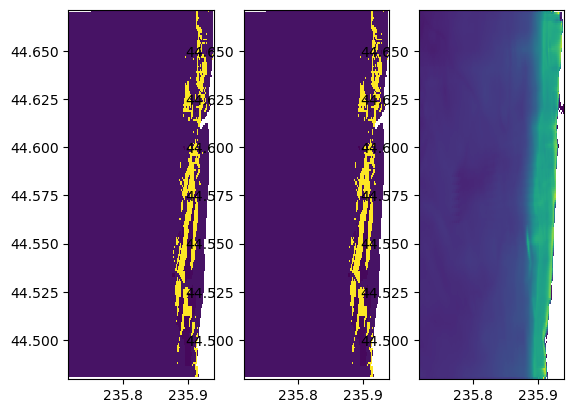

In [34]:

fig,ax = plt.subplots(ncols=3)
ax[0].pcolormesh(r_cols, r_rows, np.where(receptor_array==0, np.nan, receptor_array))
# ax[1].pcolormesh(xcor, ycor, z)
ax[1].pcolormesh(xcor, ycor, np.where(z==0, np.nan, z))
ax[2].pcolormesh(xcor, ycor, np.where(TAUMAX==0, np.nan, TAUMAX))

In [40]:
ra = np.where(receptor_array==0, np.nan, receptor_array)

In [44]:
np.unique(ra)

array([  50.,  150.,  300., 5000.,   nan], dtype=float32)

In [45]:
np.array()

array([  50.,  150.,  300., 5000.], dtype=float32)